In [47]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("Dataset/PHFood_Brazil.csv", low_memory=False)

# Displaying the first few rows of the dataset to check
df.head()

# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (439299, 52)


Missing Values in each column:
Unnamed: 0                            0
Year                                  0
Food                               2196
Food (English)                     2196
Region                             1026
State                              1026
Harvest Area (hectares)            6611
Food Production (tons)             6611
Energy (kcal)                      6611
Protein (g)                       23495
Lipids (g)                         6611
Carbohydrates (g)                  6611
Fiber (g)                         23495
Calcium (mg)                       6611
Magnesium (mg)                     8121
Manganese (mg)                    25005
Phosphorus (mg)                   23495
Iron (mg)                         23495
Potassium (mg)                     8121
Copper (mg)                        8121
Zinc (mg)                          8121
Selenium (mcg)                    64284
Retinol (mcg)                    433881
Vitamin A (mcg)                  183858
Vitamin B

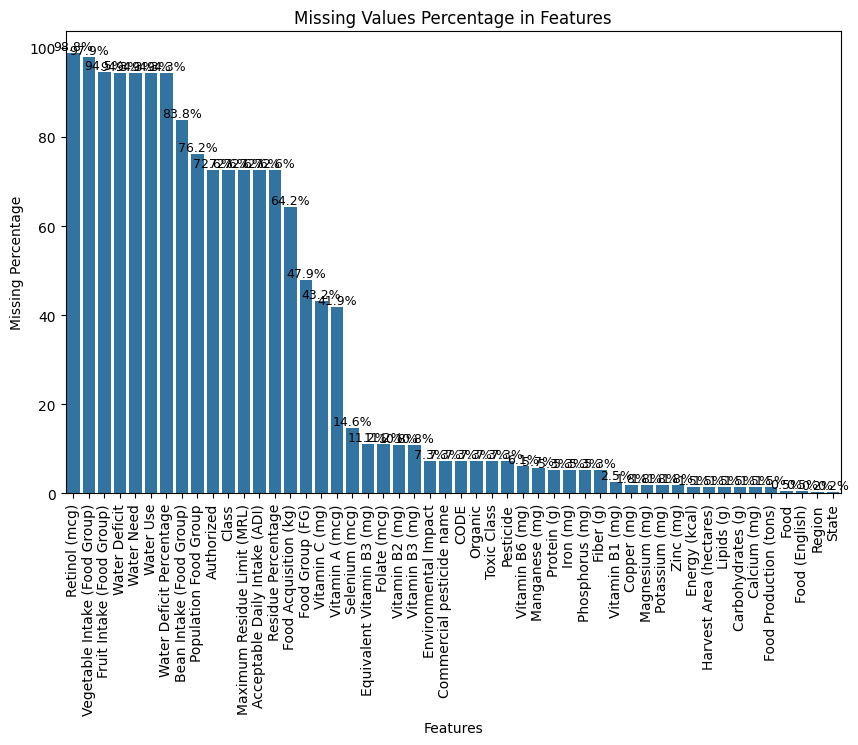

In [25]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:")
print(missing_values)

# Check for missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing Percentage")
plt.title("Missing Values Percentage in Features")

# Annotate the bars with percentages
for i, value in enumerate(missing_percentage.values):
    plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.show()

In [26]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns (mean for most, median can be used where necessary)
num_imputer = SimpleImputer(strategy="mean")  # or strategy="median" depending on your choice
df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

# Impute categorical columns with the mode (most frequent value)
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]), columns=cat_cols, index=df.index)

# Check the result
print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 Unnamed: 0                       0
Year                             0
Food                             0
Food (English)                   0
Region                           0
State                            0
Harvest Area (hectares)          0
Food Production (tons)           0
Energy (kcal)                    0
Protein (g)                      0
Lipids (g)                       0
Carbohydrates (g)                0
Fiber (g)                        0
Calcium (mg)                     0
Magnesium (mg)                   0
Manganese (mg)                   0
Phosphorus (mg)                  0
Iron (mg)                        0
Potassium (mg)                   0
Copper (mg)                      0
Zinc (mg)                        0
Selenium (mcg)                   0
Retinol (mcg)                    0
Vitamin A (mcg)                  0
Vitamin B1 (mg)                  0
Vitamin B2 (mg)                  0
Vitamin B3 (mg)                  0
Equivalent Vitamin B3

In [27]:
from sklearn.impute import SimpleImputer

# Drop columns with more than 50% missing values
df = df.dropna(thresh=0.5 * len(df), axis=1)

# Display all column names
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Food', 'Food (English)', 'Region', 'State',
       'Harvest Area (hectares)', 'Food Production (tons)', 'Energy (kcal)',
       'Protein (g)', 'Lipids (g)', 'Carbohydrates (g)', 'Fiber (g)',
       'Calcium (mg)', 'Magnesium (mg)', 'Manganese (mg)', 'Phosphorus (mg)',
       'Iron (mg)', 'Potassium (mg)', 'Copper (mg)', 'Zinc (mg)',
       'Selenium (mcg)', 'Retinol (mcg)', 'Vitamin A (mcg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Equivalent Vitamin B3 (mg)',
       'Vitamin B6 (mg)', 'Folate (mcg)', 'Vitamin C (mg)', 'Water Need',
       'Water Use', 'Water Deficit', 'Water Deficit Percentage', 'CODE',
       'Commercial pesticide name', 'Pesticide', 'Class', 'Organic',
       'Toxic Class', 'Environmental Impact', 'Authorized',
       'Maximum Residue Limit (MRL)', 'Acceptable Daily Intake (ADI)',
       'Residue Percentage', 'Food Acquisition (kg)', 'Food Group (FG)',
       'Population Food Group', 'Bean Intake (Food Group)',


In [28]:
# List of columns to drop
columns_to_drop = ["Unnamed: 0", "Year", "Region", "State", "Harvest Area (hectares)", "Food Production (tons)", "CODE", "Commercial pesticide name", "Pesticide","Organic", "Toxic Class","Environmental Impact", "Food","Food Group (FG)", "Food (English)"] 

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Check remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Energy (kcal)                  439299 non-null  float64
 1   Protein (g)                    439299 non-null  float64
 2   Lipids (g)                     439299 non-null  float64
 3   Carbohydrates (g)              439299 non-null  float64
 4   Fiber (g)                      439299 non-null  float64
 5   Calcium (mg)                   439299 non-null  float64
 6   Magnesium (mg)                 439299 non-null  float64
 7   Manganese (mg)                 439299 non-null  float64
 8   Phosphorus (mg)                439299 non-null  float64
 9   Iron (mg)                      439299 non-null  float64
 10  Potassium (mg)                 439299 non-null  float64
 11  Copper (mg)                    439299 non-null  float64
 12  Zinc (mg)                     

In [29]:
from sklearn.impute import SimpleImputer


# Fill numerical columns with mean
num_cols = df.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

# Fill categorical columns with mode — only if such columns exist
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]), columns=cat_cols, index=df.index)

# Checking summary statistics to identify scaling needs
df.describe()


,Energy (kcal),Protein (g),Lipids (g),Carbohydrates (g),Fiber (g),Calcium (mg),Magnesium (mg),Manganese (mg),Phosphorus (mg),Iron (mg),...,Water Use,Water Deficit,Water Deficit Percentage,Maximum Residue Limit (MRL),Acceptable Daily Intake (ADI),Residue Percentage,Food Acquisition (kg),Bean Intake (Food Group),Vegetable Intake (Food Group),Fruit Intake (Food Group)
count,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,...,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000
mean,1.728772e+12,5.799736e+10,5.250432e+10,2.995857e+11,3.476083e+10,3.477856e+11,3.817566e+11,3.926159e+09,1.009952e+12,1.662100e+10,...,66.899737,29.010164,48.319117,0.539637,0.035575,73.903581,1.337329,11008.167598,10574.041973,10621.255553
std,1.191925e+13,3.344501e+11,2.648563e+11,3.005304e+12,1.538663e+11,2.187452e+12,1.960049e+12,2.297299e+10,5.210624e+12,1.028233e+11,...,41.616109,19.140650,14.686561,0.961371,0.039849,14.069825,1.669373,8719.782933,2996.332072,4853.065996
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000184,0.000000,0.000000,0.002000,0.000200,0.000000,0.001000,1.000000,1.000000,1.000000
25%,5.940000e+07,1.712500e+06,3.080000e+05,1.258190e+07,3.125000e+06,1.952987e+07,2.500000e+07,1.848000e+05,3.618808e+07,4.148000e+05,...,66.899737,29.010164,48.319117,0.539637,0.035575,73.903581,1.220000,11008.167598,10574.041973,10621.255553
50%,1.469840e+10,4.820437e+08,1.379004e+08,2.565502e+09,5.633000e+08,2.823240e+09,4.522616e+09,4.832450e+07,8.589800e+09,1.350520e+08,...,66.899737,29.010164,48.319117,0.539637,0.035575,73.903581,1.337329,11008.167598,10574.041973,10621.255553
75%,1.623137e+11,6.716398e+09,2.315175e+09,3.021552e+10,6.252883e+09,3.562737e+10,4.929877e+10,6.066187e+08,1.104386e+11,2.086096e+09,...,66.899737,29.010164,48.319117,0.539637,0.035575,73.903581,1.337329,11008.167598,10574.041973,10621.255553
max,3.314224e+14,6.327424e+12,4.415128e+12,8.994979e+13,2.281523e+12,3.878589e+13,3.270183e+13,6.094993e+11,9.316220e+13,1.954885e+12,...,1377.544654,1117.550705,498.436753,25.000000,0.500000,100.000000,49.580000,283351.000000,283351.000000,283351.000000


In [30]:
# Define numerical columns (if not defined yet)
numerical_columns = df.select_dtypes(include=['number']).columns

# Check for unexpected negative or zero values in key nutrient columns
unwanted_vals = (df[numerical_columns] <= 0).sum().sort_values(ascending=False)
print("Columns with negative or zero values:\n", unwanted_vals[unwanted_vals > 0])

# You can also check for unrealistic ranges (e.g., extremely high values for vitamins, proteins, etc.)
# Example: checking if any protein value exceeds a threshold (e.g., 1000g)
unrealistic_vals = (df["Protein (g)"] > 1000).sum()
if unrealistic_vals > 0:
    print(f"Found {unrealistic_vals} unrealistic protein values (greater than 1000g).")


Columns with negative or zero values:
 Energy (kcal)                 96769
Lipids (g)                    96769
Calcium (mg)                  96769
Carbohydrates (g)             96769
Protein (g)                   96114
Fiber (g)                     96114
Iron (mg)                     96114
Phosphorus (mg)               96114
Magnesium (mg)                95376
Potassium (mg)                95376
Zinc (mg)                     95376
Copper (mg)                   95376
Manganese (mg)                94721
Vitamin B1 (mg)               94714
Vitamin B2 (mg)               93389
Vitamin B3 (mg)               93389
Vitamin B6 (mg)               93267
Equivalent Vitamin B3 (mg)    91996
Folate (mcg)                  91996
Selenium (mcg)                74735
Vitamin A (mcg)               72987
Vitamin C (mg)                64520
Retinol (mcg)                  1624
Water Deficit                   361
Water Deficit Percentage        361
Residue Percentage              210
dtype: int64
Found 343185

In [31]:
import pandas as pd

# Selecting only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Finding correlation matrix
corr_matrix = numeric_df.corr().abs()

# Extract upper triangle of correlation matrix to remove duplicates
upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))

# Finding highly correlated features (above 0.85)
high_corr_features = upper_tri.stack().reset_index()
high_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display highly correlated features
print("Highly Correlated Features (above 0.85):\n", high_corr_features[high_corr_features['Correlation'] > 0.85])

Highly Correlated Features (above 0.85):
                       Feature 1          Feature 2  Correlation
2                 Energy (kcal)  Carbohydrates (g)     0.959180
33                  Protein (g)         Lipids (g)     0.937246
35                  Protein (g)          Fiber (g)     0.865434
36                  Protein (g)       Calcium (mg)     0.912076
37                  Protein (g)     Magnesium (mg)     0.917472
..                          ...                ...          ...
428             Vitamin B2 (mg)       Folate (mcg)     0.894932
456  Equivalent Vitamin B3 (mg)    Vitamin B6 (mg)     0.978296
457  Equivalent Vitamin B3 (mg)       Folate (mcg)     0.940785
470             Vitamin B6 (mg)       Folate (mcg)     0.862126
506                  Water Need          Water Use     0.967712

[93 rows x 3 columns]


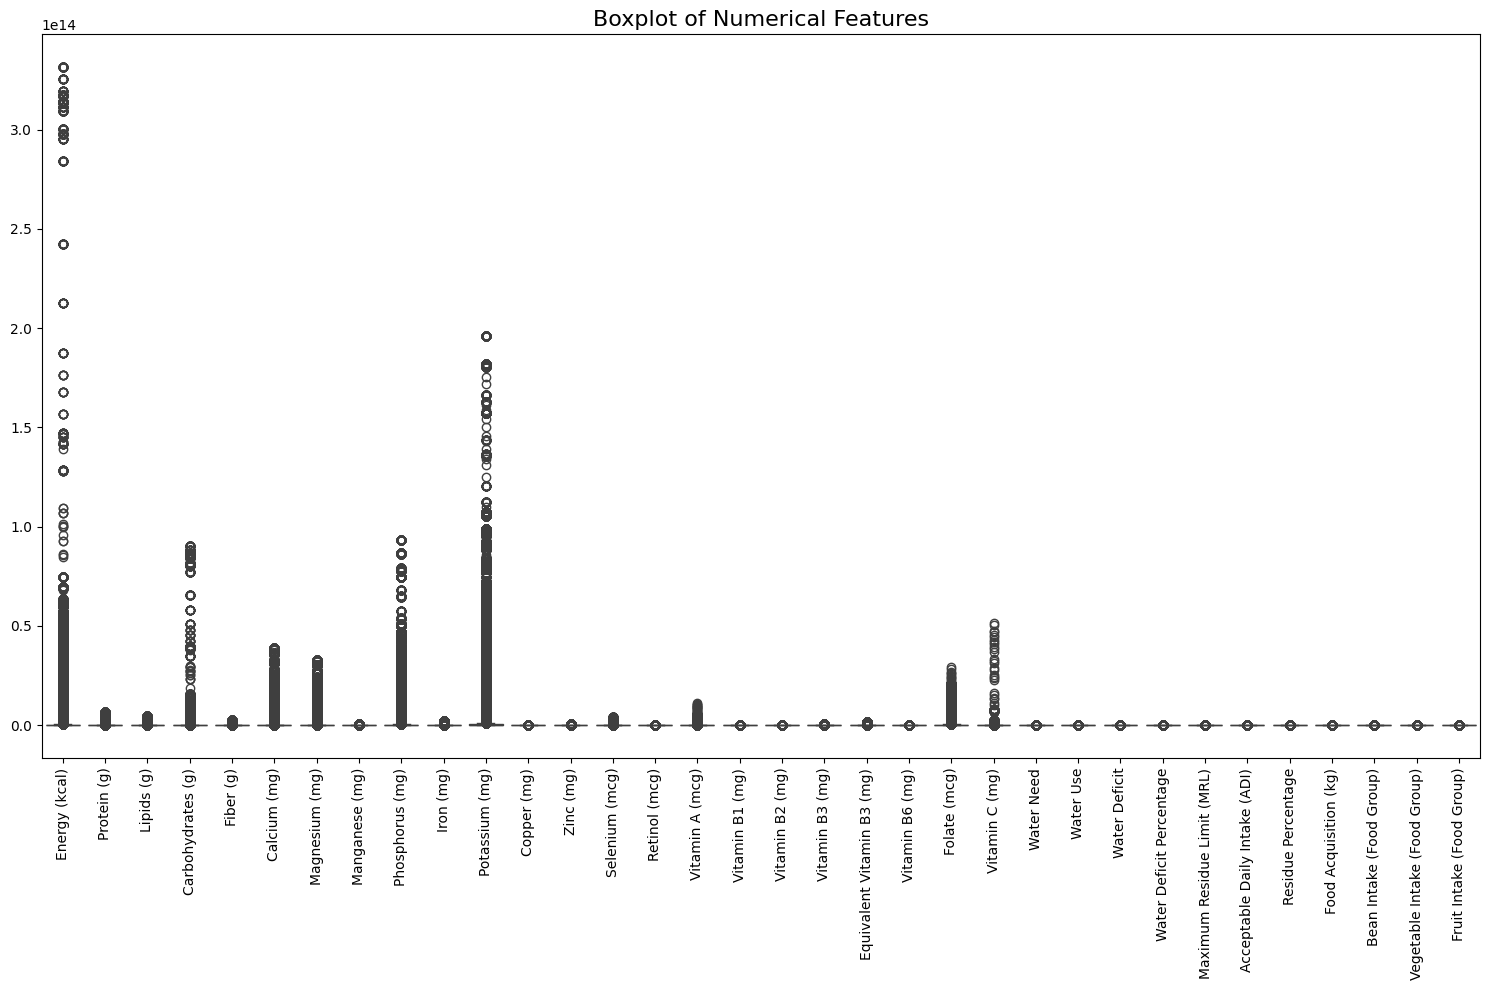

In [32]:
# Summary statistics for numerical columns
df.describe()

# Data distribution for numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Boxplot for numerical columns to check for spread and any potential outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns], orient="v")
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [33]:
# Compute Q1, Q3, and IQR for numerical columns
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

print("\nNumber of Outliers Detected by IQR Method:")
print(outliers_iqr)



Number of Outliers Detected by IQR Method:
Energy (kcal)                     81123
Protein (g)                       84322
Lipids (g)                        82879
Carbohydrates (g)                 78737
Fiber (g)                         83056
Calcium (mg)                      73681
Magnesium (mg)                    80781
Manganese (mg)                    79407
Phosphorus (mg)                   83125
Iron (mg)                         82429
Potassium (mg)                    75221
Copper (mg)                       76400
Zinc (mg)                         82717
Selenium (mcg)                    35482
Retinol (mcg)                      5418
Vitamin A (mcg)                   23701
Vitamin B1 (mg)                   77081
Vitamin B2 (mg)                   94241
Vitamin B3 (mg)                   97672
Equivalent Vitamin B3 (mg)        91699
Vitamin B6 (mg)                   79096
Folate (mcg)                      35446
Vitamin C (mg)                    21765
Water Need                        24

In [34]:
# Remove outliers using IQR method
df_no_outliers_iqr = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show dataset shape changes
rows_removed = df.shape[0] - df_no_outliers_iqr.shape[0]
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing outliers (IQR method): {df_no_outliers_iqr.shape}")
print(f"Total rows removed: {rows_removed}")


Original shape: (439299, 37)
Shape after removing outliers (IQR method): (156923, 37)
Total rows removed: 282376


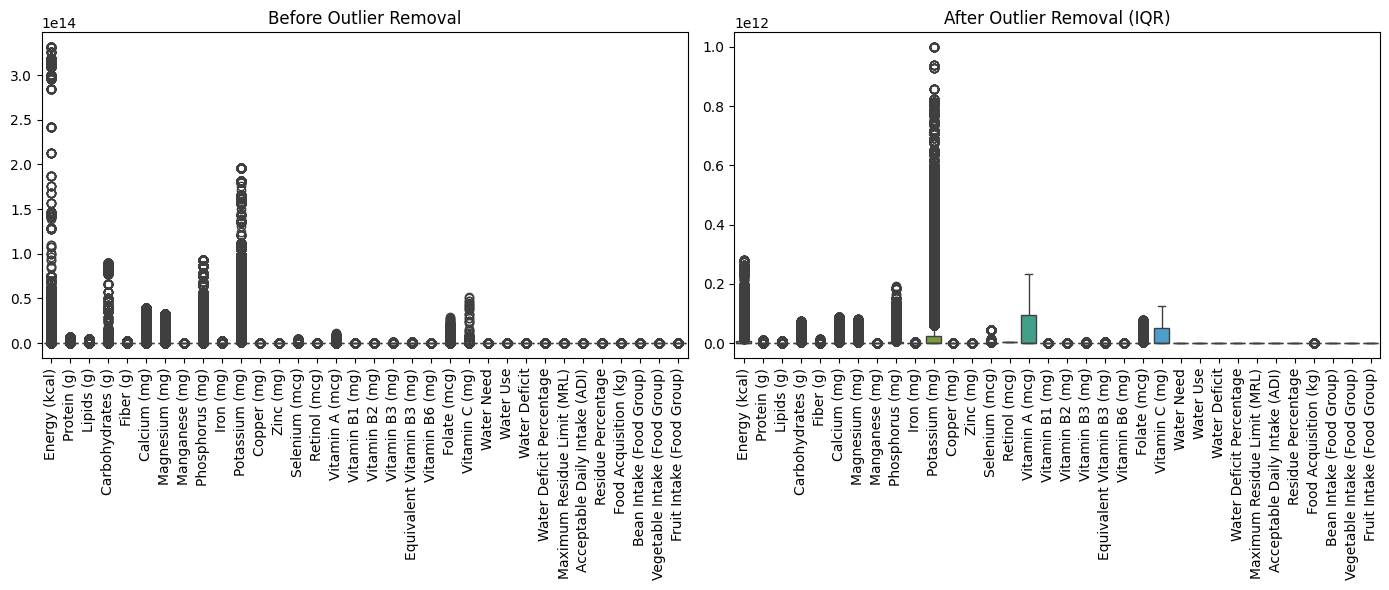

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns again to avoid issues
numeric_cols = df.select_dtypes(include=['number']).columns

# Adjust figure size for better visualization
plt.figure(figsize=(14, 6))

# Before Outlier Removal
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Before Outlier Removal')

# After Outlier Removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers_iqr[numeric_cols])
plt.xticks(rotation=90)
plt.title('After Outlier Removal (IQR)')

plt.tight_layout()
plt.show()

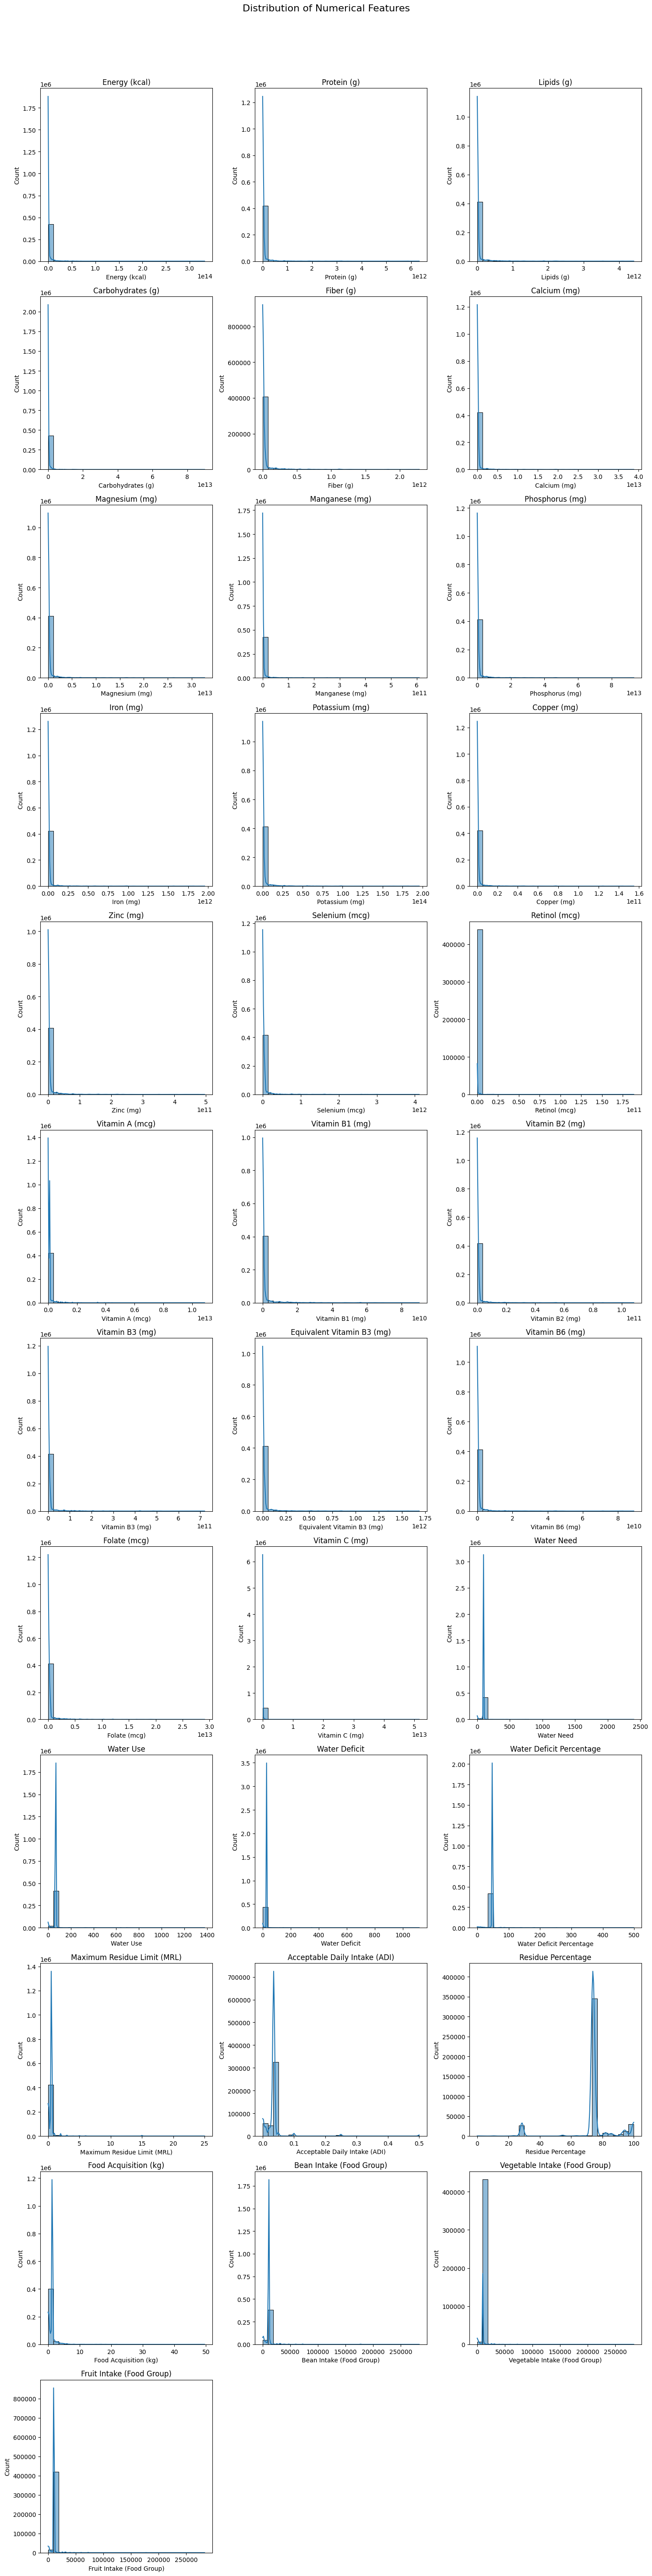

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Determine grid size for subplots
num_features = len(numerical_columns)
cols = 3  # Number of columns in the grid
rows = -(-num_features // cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot histograms with KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

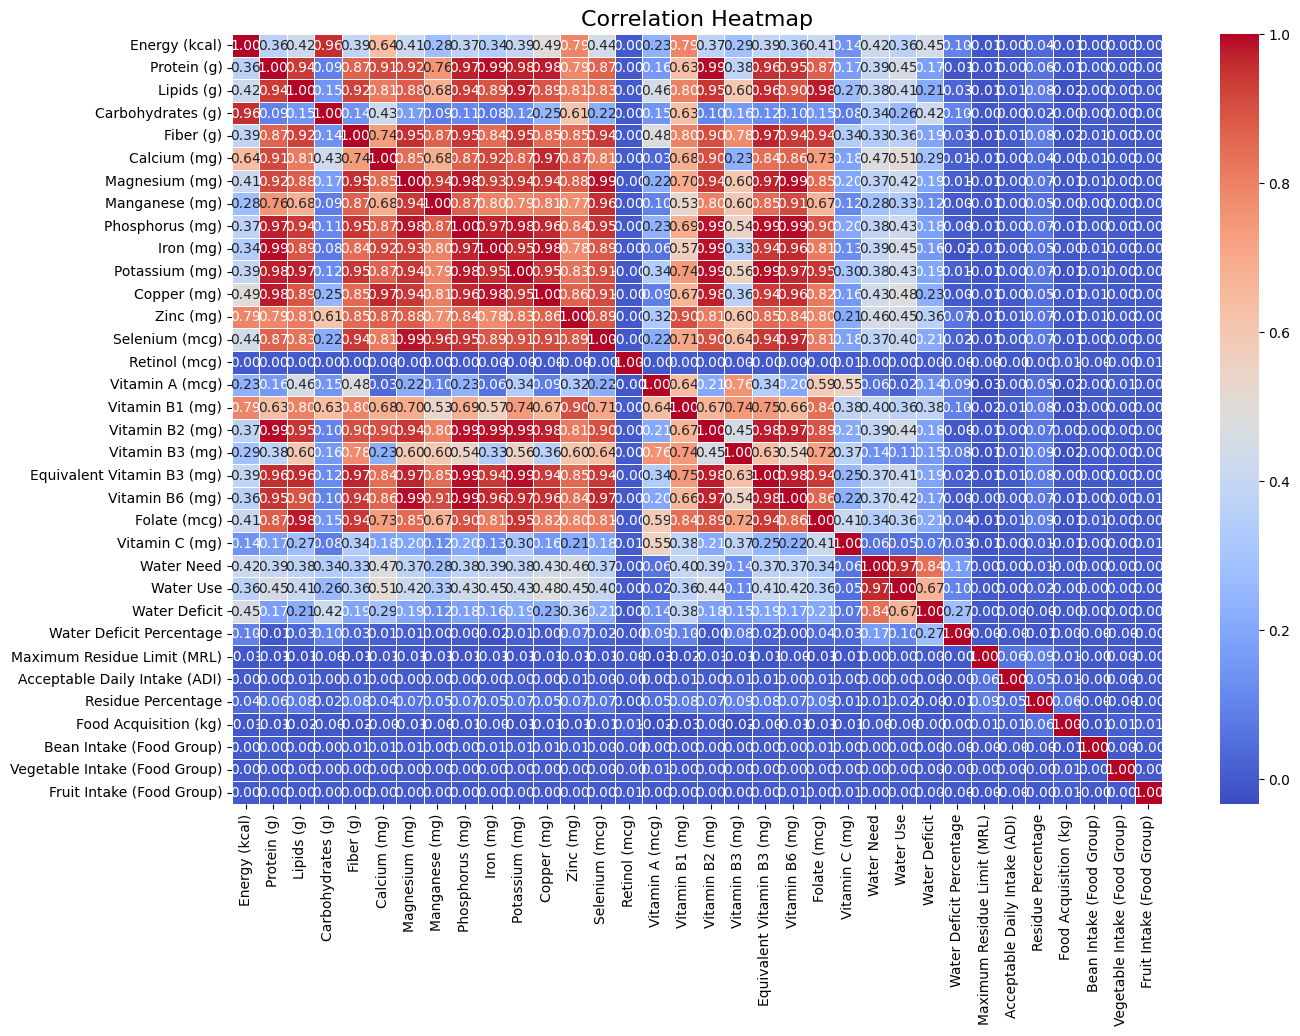

In [37]:
# Correlation heatmap for numerical features
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

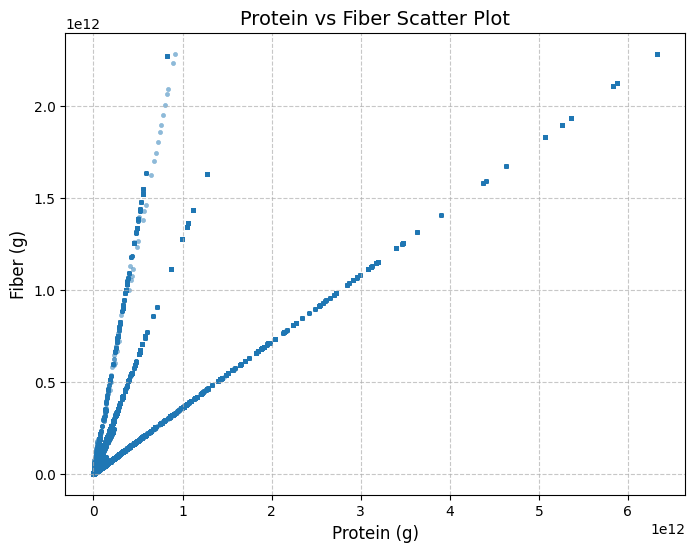

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Protein (g)", y="Fiber (g)", alpha=0.5, s=10, edgecolor=None)  # Transparency & smaller points

plt.title("Protein vs Fiber Scatter Plot", fontsize=14)
plt.xlabel("Protein (g)", fontsize=12)
plt.ylabel("Fiber (g)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)  # Add grid for better readability
plt.show()

In [40]:
# -----> Model Training and Evaluation

# Creating target variable column if not already present
df["healthy"] = df["Energy (kcal)"] < 250  # Initial rule-based labeling
df["healthy"] = df["healthy"].astype(int)

# Define a more comprehensive health score
df["health_score"] = (
    df["Protein (g)"] * 2 +            # More protein = better
    df["Fiber (g)"] * 1.5 +            # Fiber is also good
    df["Vitamin A (mcg)"] * 0.5 +
    df["Vitamin C (mg)"] * 0.5 +
    df["Iron (mg)"] * 0.5 +
    df["Calcium (mg)"] * 0.5 -
    df["Lipids (g)"] * 1 -             # Fats and carbs reduce score
    df["Carbohydrates (g)"] * 0.5
)

# Classify as healthy if above median health score
df["healthy"] = (df["health_score"] >= df["health_score"].median()).astype(int)

# Foods above the median score → healthy = 1
# Foods below the median score → healthy = 0


Class Counts:
 healthy
1    219651
0    219648
Name: count, dtype: int64

Class Distribution (%):
 healthy
1    50.000341
0    49.999659
Name: proportion, dtype: float64


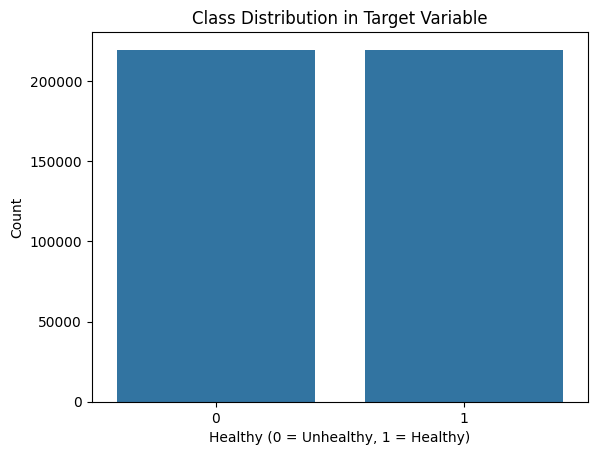

In [41]:
# Check class balance in the target variable
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = df["healthy"].value_counts()
class_percent = df["healthy"].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Distribution (%):\n", class_percent)

# Visualize class balance
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Healthy (0 = Unhealthy, 1 = Healthy)")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")
plt.show()


Class Counts:
 healthy
1    219651
0    219648
Name: count, dtype: int64

Class Distribution (%):
 healthy
1    50.000341
0    49.999659
Name: proportion, dtype: float64


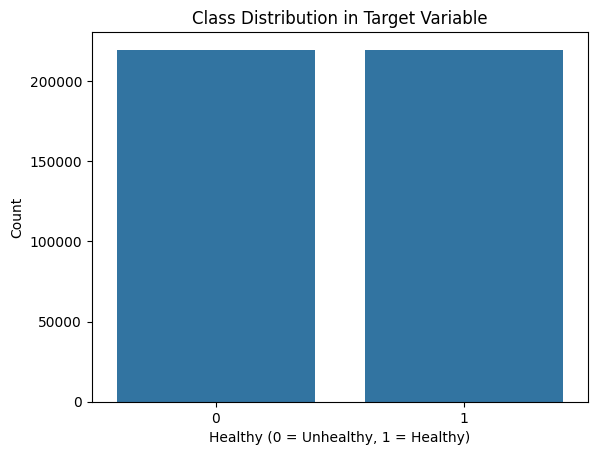

Training set size: (351439, 38)
Testing set size: (87860, 38)
Categorical Columns: ['Class', 'Authorized', 'Population Food Group']
Random Forest Classifier Score: 1.0
AdaBoost Classifier Score: 1.0
XGBoost Classifier Score: 0.9999772365126337


In [42]:
# Step 1: Check class balance in the target variable
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = df["healthy"].value_counts()
class_percent = df["healthy"].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Distribution (%):\n", class_percent)

# Visualize class balance
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Healthy (0 = Unhealthy, 1 = Healthy)")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")
plt.show()

# Step 2: Handle class imbalance using class weights (no SMOTE)
# Class weight is handled inside the model during training

# Separate features and target variable
X = df.drop(columns=["healthy"])  # Drop 'healthy' column
y = df["healthy"]  # Target variable

# Step 3: Split the data into train and test sets
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Step 4: Check if categorical columns exist and apply one-hot encoding if needed
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

# Apply One-Hot Encoding (only if categorical columns exist)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

if len(categorical_cols) > 0:
    # Define the transformer for categorical features
    preprocessor = ColumnTransformer(
        transformers=[('cat', OneHotEncoder(), categorical_cols)],
        remainder='passthrough'  # Keep other columns as is
    )
    
    # Apply One-Hot Encoding
    X_train_encoded = preprocessor.fit_transform(X_train)
    X_test_encoded = preprocessor.transform(X_test)
else:
    X_train_encoded, X_test_encoded = X_train, X_test

# Step 5: Train classifiers with class weights (no resampling needed)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Initialize classifiers with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
ada = AdaBoostClassifier(random_state=42)
xgb = XGBClassifier(scale_pos_weight=1, random_state=42)

# Train the models using the encoded training data
rf.fit(X_train_encoded, y_train)
ada.fit(X_train_encoded, y_train)
xgb.fit(X_train_encoded, y_train)

# Evaluate the models (you can print or calculate metrics like accuracy, precision, recall, etc.)
print("Random Forest Classifier Score:", rf.score(X_test_encoded, y_test))
print("AdaBoost Classifier Score:", ada.score(X_test_encoded, y_test))
print("XGBoost Classifier Score:", xgb.score(X_test_encoded, y_test))


In [23]:
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop(columns=["health_score", "healthy"])  # Features
y = df["healthy"]  # Target variable

# Split into 80% training and 20% testing with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (351439, 37)
Testing set size: (87860, 37)


In [43]:
#checking if categorical column exist
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Class', 'Authorized', 'Population Food Group']


In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding only if categorical columns exist
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  #  Fixed parameter
    ],
    remainder='passthrough'
)

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Convert back to DataFrame to retain column names
encoded_feature_names = encoder.get_feature_names_out()
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

print(" One-Hot Encoding Applied Successfully!")

 One-Hot Encoding Applied Successfully!


In [45]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Convert back to DataFrame after scaling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns, index=X_test.index)

print(" Feature Normalization Applied Successfully!")

 Feature Normalization Applied Successfully!


In [48]:
#Train & Evaluate Base Random Forest (Before Tuning)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the base Random Forest model
rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_base.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf_base = rf_base.predict(X_test_scaled)

# Evaluate the model
print("🔍 Base Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_base))
print("Precision:", precision_score(y_test, y_pred_rf_base))
print("Recall:", recall_score(y_test, y_pred_rf_base))
print("F1 Score:", f1_score(y_test, y_pred_rf_base))

# Optional: View confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_base))


🔍 Base Random Forest Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
[[43930     0]
 [    0 43930]]


In [51]:
#Train and Evaluate Base Model for Adaboost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize base AdaBoost classifier
ada_base = AdaBoostClassifier(random_state=42)

# Train the model
ada_base.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_ada_base = ada_base.predict(X_test_scaled)

# Evaluate the model
print("🔍 Base AdaBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada_base))
print("Precision:", precision_score(y_test, y_pred_ada_base))
print("Recall:", recall_score(y_test, y_pred_ada_base))
print("F1 Score:", f1_score(y_test, y_pred_ada_base))

# Optional: View confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada_base))


🔍 Base AdaBoost Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
[[43930     0]
 [    0 43930]]


In [ ]:
#Train and Evaluate Base Model for Xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize base XGBoost model
xgb_base = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_base.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_xgb_base = xgb_base.predict(X_test_scaled)

# Evaluate the model
print("🔍 Base XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_base))
print("Precision:", precision_score(y_test, y_pred_xgb_base))
print("Recall:", recall_score(y_test, y_pred_xgb_base))
print("F1 Score:", f1_score(y_test, y_pred_xgb_base))

# Optional: View confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_base))


h:\Food-Classification-Model\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔍 Base XGBoost Evaluation:
Accuracy: 0.9999772365126337
Precision: 1.0
Recall: 0.9999544730252675
F1 Score: 0.9999772359944455

Confusion Matrix:
[[43930     0]
 [    2 43928]]


In [53]:
#Train and Evaluate Base Model for Hard Voting

from sklearn.ensemble import VotingClassifier

# Create the VotingClassifier with hard voting
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_base),
        ('ada', ada_base),
        ('xgb', xgb_base)
    ],
    voting='hard'  # Use majority class voting
)

# Train the VotingClassifier
voting_clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluate the model
print("🔍 Hard Voting Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Precision:", precision_score(y_test, y_pred_voting))
print("Recall:", recall_score(y_test, y_pred_voting))
print("F1 Score:", f1_score(y_test, y_pred_voting))

# Optional: View confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))


h:\Food-Classification-Model\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔍 Hard Voting Classifier Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
[[43930     0]
 [    0 43930]]
